In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000933590"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000933590
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"Your Community Bankshares, Inc."
Ticker,CBIN


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,6.0,2.320000e+01,1.445185e+00,21.53,2.206750e+01,23.125,2.412250e+01,25.25
interest income,36.0,9.700879e+06,2.843236e+06,14640.00,8.419000e+06,8766500.000,1.082475e+07,15263000.00
net income,36.0,9.485491e+05,4.571453e+06,-24870000.00,9.475000e+05,1845000.000,2.162000e+06,3917000.00
net interest income,36.0,7.584555e+06,2.826139e+06,12979.00,6.055500e+06,7077000.000,7.891250e+06,13914000.00
provision for loan losses,36.0,1.205539e+06,2.381624e+06,0.00,2.327500e+05,800000.000,1.076250e+06,14346000.00


# Plots

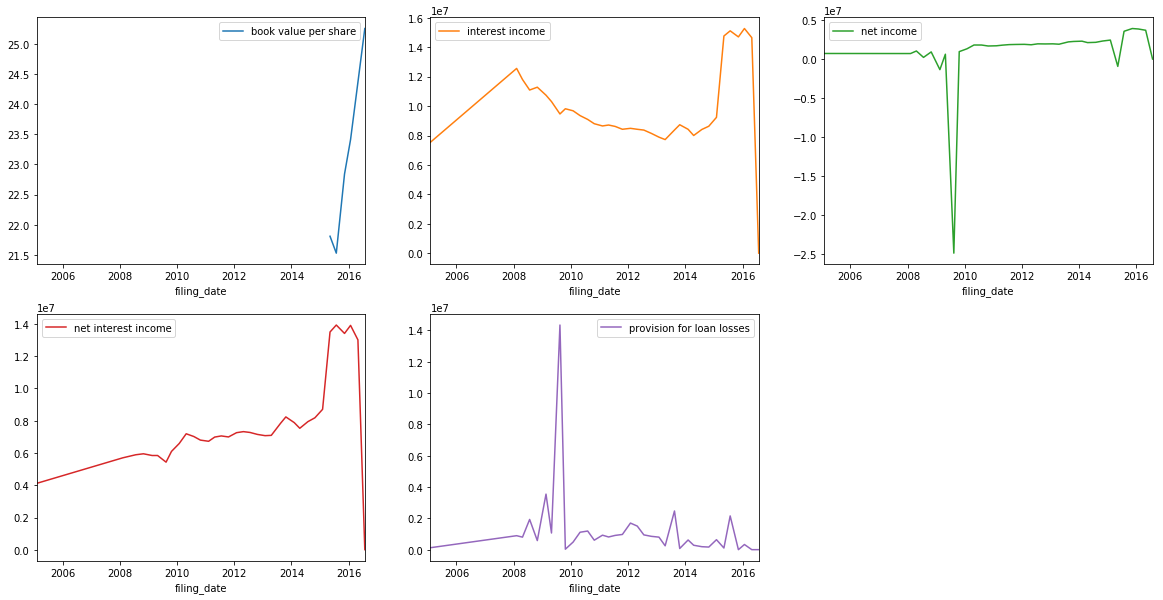

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000933590 book value per share       2004Q4 to 2014Q4: 41 periods  missing   
           interest income            2005Q1 to 2007Q3: 11 periods  missing   
           net income                 2005Q1 to 2007Q3: 11 periods  missing   
           net interest income        2005Q1 to 2007Q3: 11 periods  missing   
           provision for loan losses  2005Q1 to 2007Q3: 11 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000933590 book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()